<a href="https://colab.research.google.com/github/HubZun/tesbranch/blob/main/Salinan_dari_Analisis_Data_Nutrition_Facts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset

*   **Nama**: Auliya Rahman
*   **ML-09**
*   **m269b4ky0732**



In [ ]:
pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
day_df = pd.read_csv ('/content/drive/My Drive/openfoodfacts_cleaned.csv')
day_df.head()

<ipython-input-7-f3d5975c388c>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  day_df = pd.read_csv ('/content/drive/My Drive/openfoodfacts_cleaned.csv')


,Unnamed: 0,product_name,generic_name,quantity,brands,categories_en,origins_en,countries_en,traces_en,additives_n,...,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,3,Skyr,NaN,480 g,Danone,"Dairies,Fermented foods,Fermented milk product...",NaN,France,NaN,NaN,...,10.0,0.09,0.036,NaN,NaN,NaN,NaN,NaN,NaN,-5.0
1,4,Vitória crackers,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,...,7.8,1.40,0.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,Hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,NaN,Spain,NaN,NaN,...,15.7,2.10,0.840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,Blueberry Cobbler Coffee,NaN,NaN,NaN,NaN,NaN,United States,NaN,NaN,...,0.0,0.00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,...,0.2,2.04,0.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982824 entries, 0 to 1982823
Data columns (total 36 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   Unnamed: 0                                             int64  
 1   product_name                                           object 
 2   generic_name                                           object 
 3   quantity                                               object 
 4   brands                                                 object 
 5   categories_en                                          object 
 6   origins_en                                             object 
 7   countries_en                                           object 
 8   traces_en                                              object 
 9   additives_n                                            float64
 10  additives_en                                           object 
 11

In [ ]:
day_df.isna().sum()

,0
product_name,0
countries_en,0
nutriscore_score,922522
energy-kcal_100g,0
fat_100g,0
saturated-fat_100g,0
carbohydrates_100g,0
sugars_100g,0
fiber_100g,0
proteins_100g,0


In [ ]:
columns_to_drop = [
    'Unnamed: 0', 'generic_name', 'quantity', 'brands', 'categories_en', 'origins_en',
    'traces_en', 'additives_n', 'additives_en', 'food_groups_en', 'ecoscore_score',
    'ecoscore_grade', 'main_category_en', 'monounsaturated-fat_100g',
    'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'vitamin-a_100g',
    'vitamin-c_100g', 'potassium_100g', 'calcium_100g', 'iron_100g'
]

day_df = day_df.drop(columns=columns_to_drop)


In [ ]:
day_df['fiber_100g'].fillna(day_df['fiber_100g'].median(), inplace=True)
day_df['fruits-vegetables-nuts-estimate-from-ingredients_100g'].fillna(0, inplace=True)


<ipython-input-13-ba1c3eb785d9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['fiber_100g'].fillna(day_df['fiber_100g'].median(), inplace=True)
<ipython-input-13-ba1c3eb785d9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df = day_df.drop_duplicates()

In [ ]:
print(day_df.info())
print(day_df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 1890915 entries, 0 to 1982823
Data columns (total 15 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   product_name                                           object 
 1   countries_en                                           object 
 2   nutriscore_score                                       float64
 3   energy-kcal_100g                                       float64
 4   fat_100g                                               float64
 5   saturated-fat_100g                                     float64
 6   carbohydrates_100g                                     float64
 7   sugars_100g                                            float64
 8   fiber_100g                                             float64
 9   proteins_100g                                          float64
 10  salt_100g                                              float64
 11  sod

In [ ]:
day_df['energy_kj'] = day_df['energy-kcal_100g'] * 4.184


In [ ]:
def calculate_nutri_score(energy_kj, sugar_g, sat_fat_g, sodium_mg, fruits_percent, fiber_g, protein_g):
    # Calculate negative points
    negative_points = 0
    if energy_kj > 3350: negative_points += 10
    elif energy_kj > 3015: negative_points += 9
    elif energy_kj > 2680: negative_points += 8
    elif energy_kj > 2345: negative_points += 7
    elif energy_kj > 2010: negative_points += 6
    elif energy_kj > 1675: negative_points += 5
    elif energy_kj > 1340: negative_points += 4
    elif energy_kj > 1005: negative_points += 3
    elif energy_kj > 670: negative_points += 2
    elif energy_kj > 335: negative_points += 1

    if sugar_g > 45: negative_points += 10
    elif sugar_g > 40: negative_points += 9
    elif sugar_g > 36: negative_points += 8
    elif sugar_g > 31: negative_points += 7
    elif sugar_g > 27: negative_points += 6
    elif sugar_g > 22.5: negative_points += 5
    elif sugar_g > 18: negative_points += 4
    elif sugar_g > 13.5: negative_points += 3
    elif sugar_g > 9: negative_points += 2
    elif sugar_g > 4.5: negative_points += 1

    if sat_fat_g > 10: negative_points += 10
    elif sat_fat_g > 9: negative_points += 9
    elif sat_fat_g > 8: negative_points += 8
    elif sat_fat_g > 7: negative_points += 7
    elif sat_fat_g > 6: negative_points += 6
    elif sat_fat_g > 5: negative_points += 5
    elif sat_fat_g > 4: negative_points += 4
    elif sat_fat_g > 3: negative_points += 3
    elif sat_fat_g > 2: negative_points += 2
    elif sat_fat_g > 1: negative_points += 1

    if sodium_mg > 900: negative_points += 10
    elif sodium_mg > 800: negative_points += 9
    elif sodium_mg > 700: negative_points += 8
    elif sodium_mg > 600: negative_points += 7
    elif sodium_mg > 500: negative_points += 6
    elif sodium_mg > 400: negative_points += 5
    elif sodium_mg > 300: negative_points += 4
    elif sodium_mg > 200: negative_points += 3
    elif sodium_mg > 100: negative_points += 2
    elif sodium_mg > 90: negative_points += 1

    # Calculate positive points
    positive_points = 0
    if fruits_percent > 80: positive_points += 5
    elif fruits_percent > 60: positive_points += 4
    elif fruits_percent > 40: positive_points += 2
    elif fruits_percent > 20: positive_points += 1

    if fiber_g > 4.7: positive_points += 5
    elif fiber_g > 3.7: positive_points += 4
    elif fiber_g > 2.8: positive_points += 3
    elif fiber_g > 1.9: positive_points += 2
    elif fiber_g > 0.9: positive_points += 1

    if protein_g > 8: positive_points += 5
    elif protein_g > 6.4: positive_points += 4
    elif protein_g > 4.8: positive_points += 3
    elif protein_g > 3.2: positive_points += 2
    elif protein_g > 1.6: positive_points += 1

    # Adjust final score
    final_score = negative_points - positive_points

    # Determine Nutri-Score letter
    if final_score < -1:
        return "A"
    elif final_score <= 2:
        return "B"
    elif final_score <= 10:
        return "C"
    elif final_score <= 18:
        return "D"
    else:
        return "E"

In [ ]:
day_df['Nutri-Score'] = day_df.apply(lambda row: calculate_nutri_score(
    energy_kj=row['energy_kj'],
    sugar_g=row['sugars_100g'],
    sat_fat_g=row['saturated-fat_100g'],
    sodium_mg=row['sodium_100g'],
    fruits_percent=row['fruits-vegetables-nuts-estimate-from-ingredients_100g'],
    fiber_g=row['fiber_100g'],
    protein_g=row['proteins_100g']
), axis=1)

In [ ]:
print(day_df[['product_name', 'Nutri-Score']].head())


                   product_name Nutri-Score
0                          Skyr           A
1              Vitória crackers           C
2  Hamburguesas de ternera 100%           C
3      Blueberry Cobbler Coffee           B
4         Sauce Sweety chili 0%           B


In [ ]:
# Statistik deskriptif
day_df.describe(include="all")

,product_name,countries_en,nutriscore_score,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g,energy_kj,Nutri-Score
count,1890915,1890915,968393.000000,1.890915e+06,1.890915e+06,1.890915e+06,1.890915e+06,1.890915e+06,1.890915e+06,1.890915e+06,1.890915e+06,1.890915e+06,1.890915e+06,968393.000000,1.890915e+06,1890915
unique,1269709,5551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,Chocolat,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
freq,817,609488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532302
mean,NaN,NaN,8.953903,7.509593e+09,1.492995e+01,5.167778e+00,2.893889e+01,1.284429e+01,2.383861e+00,9.184295e+00,4.230762e+07,1.692305e+07,6.891957e+00,8.953903,3.142014e+10,NaN
std,NaN,NaN,8.854123,1.032648e+13,8.789556e+02,7.387684e+01,3.365217e+02,9.992442e+01,5.503532e+00,7.916505e+01,5.817736e+10,2.327094e+10,2.477404e+01,8.854123,4.320600e+13,NaN
min,NaN,NaN,-15.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,-8.330000e+00,0.000000e+00,0.000000e+00,-4.053013e+00,-15.000000,0.000000e+00,NaN
25%,NaN,NaN,1.000000,1.140000e+02,1.100000e+00,1.000000e-01,3.800000e+00,6.000000e-01,1.600000e+00,1.900000e+00,1.000000e-01,4.000000e-02,0.000000e+00,1.000000,4.769760e+02,NaN
50%,NaN,NaN,9.000000,2.690000e+02,8.000000e+00,2.000000e+00,1.700000e+01,3.570000e+00,1.600000e+00,6.300000e+00,6.200000e-01,2.480000e-01,0.000000e+00,9.000000,1.125496e+03,NaN
75%,NaN,NaN,16.000000,4.030000e+02,2.190000e+01,7.142857e+00,5.300000e+01,1.750000e+01,1.600000e+00,1.260000e+01,1.400000e+00,5.600000e-01,0.000000e+00,16.000000,1.686152e+03,NaN


In [ ]:
# Distribusi Nutri-Score
day_df['Nutri-Score'].value_counts()

,count
Nutri-Score,
B,532302
C,496597
A,488399
D,275360
E,98257


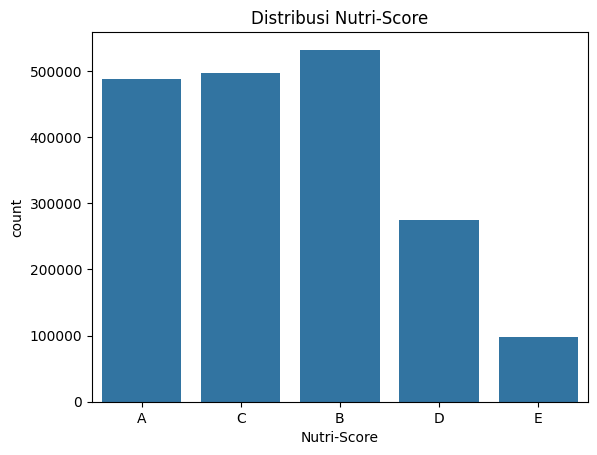

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi Nutri-Score
sns.countplot(x='Nutri-Score', data=day_df)
plt.title('Distribusi Nutri-Score')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Misalkan kita ingin memprediksi 'nutri_grade' berdasarkan fitur lainnya
X = day_df.drop(columns=['Nutri-Score'])
y = day_df['Nutri-Score']

# Split data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
